# Left4Dead Machine Learning Project
I used to play Left4Dead and Left4Dead 2 when I was younger, and there is a lot of data available thanks to Jack Lacey on Kaggle.com [1]. This project will showcase usage of ML algorithms and feature engineering to predict playtime.

First, let's inspect the dataset. Since the data will not be updated, just upload the whole dataset.

In [60]:
import numpy as np                                        # need Numpy .where method
import pandas as pd                                       # Import pandas to work with dataframes
from sklearn.model_selection import train_test_split      # Split into training and testing sets
from sklearn.linear_model import LinearRegression         # Import LinearRegression model
from sklearn.tree import DecisionTreeRegressor            # Decision Tree regression
from sklearn.ensemble import AdaBoostRegressor            # Adaboost regression
from sklearn.linear_model import Ridge                    # Ridge regression
from sklearn.linear_model import Lasso                    # Lasso regression
from sklearn.linear_model import SGDRegressor             # Stochastic GD
import matplotlib.pyplot as plt  # Matplotlib

In [2]:
d = pd.read_csv('l4d2_player_stats_final.csv')

In [3]:
d.info() # Info gives quick view on dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20830 entries, 0 to 20829
Columns: 113 entries, Username to Average_Friendly_Fire
dtypes: float64(111), int64(1), object(1)
memory usage: 18.0+ MB


A quick look at the info shows that there are 20830 rows and 113 features.

Each row describes one player's stats.

Each column describes a player attribute, say, the amount of kills with an uzi submachine gun, amount of kills with a pistol, etc.

For this project, I want to use Machine Learning algorithms to predict playtime, so that will be the target variable (feature, attribute, etc).

Quickly, let's look at summary statistics for the dataset.

In [4]:
d.describe() # summary statistics

,Username,Playtime_(Hours),Pistol_Shots,Pistol_Kills,Pistol_Usage,Magnum_Shots,Magnum_Kills,Magnum_Usage,Uzi_Shots,Uzi_Kills,...,Knife_Kills,Knife_Usage,Molotovs_Thrown,Molotov_Kills,Pipe_Bombs_Thrown,Pipe_Bomb_Kills,Bile_Jars_Thrown,Bile_Jar_Hits,Most_Friendly_Fire,Average_Friendly_Fire
count,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,...,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,2.083000e+04,20830.000000
mean,10414.500000,104.684003,12389.739558,2031.092127,8.035493,4948.215218,1984.546471,5.151902,7227.586990,1274.591119,...,18.040278,0.050348,248.814546,2000.592751,255.532117,1799.752184,120.713778,179.056313,4.976528e+04,81.363946
std,6013.247389,1974.873029,24198.764272,3944.710074,6.324443,16679.459523,8250.642273,5.586247,20501.115475,3779.680779,...,202.059539,0.302169,1333.472437,10028.704910,924.607365,6059.289202,586.911986,873.542727,6.928768e+06,879.579826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,5207.250000,19.027153,3336.500000,519.000000,4.800000,522.000000,164.000000,1.580000,1204.000000,195.000000,...,0.000000,0.000000,33.000000,237.000000,43.000000,286.000000,15.000000,22.000000,3.010000e+02,35.000000
50%,10414.500000,36.110417,6568.000000,1060.000000,6.680000,1462.000000,502.000000,3.540000,2923.500000,506.000000,...,0.000000,0.000000,75.000000,583.000000,95.000000,658.000000,36.000000,58.000000,7.050000e+02,55.000000
75%,15621.750000,73.698333,12966.750000,2153.000000,9.470000,3918.000000,1446.000000,6.807500,6364.250000,1146.750000,...,0.000000,0.000000,175.000000,1388.750000,210.750000,1457.000000,86.000000,137.000000,1.441000e+03,88.000000
max,20829.000000,277827.960278,608711.000000,131565.000000,100.000000,627966.000000,411640.000000,100.000000,731767.000000,152921.000000,...,18605.000000,21.320000,125856.000000,635486.000000,55566.000000,249158.000000,41774.000000,87673.000000,1.000000e+09,121347.000000


It is worth noting that 0 is contained as the minimum for all variables we have a view on. It is worth inspecting if there is a "statistic" tracked for someone who logged on, but never actually played the game.

There are 533 players tracked at 0 playtime.

In [6]:
len(np.where(d['Playtime_(Hours)'] == 0)[0])

533

Zero playtime must mean not playing the game at all, or the value is just missing. Let's see if playtime is missing for these players, or if all other attributes for that player are zero.

There are two (or more) ways to do this.
1. Inspect the data manually using the indices given above.
2. Create a function that returns a list of observation indices that are all zero. 

In [7]:
# 1. Manual inspection

# array of indices where players have 0 playtime
zero_playtime_arr = np.where(d['Playtime_(Hours)'] == 0)[0]

# Locate indides where playtime is 0
d.loc[zero_playtime_arr]

,Username,Playtime_(Hours),Pistol_Shots,Pistol_Kills,Pistol_Usage,Magnum_Shots,Magnum_Kills,Magnum_Usage,Uzi_Shots,Uzi_Kills,...,Knife_Usage,Molotovs_Thrown,Molotov_Kills,Pipe_Bombs_Thrown,Pipe_Bomb_Kills,Bile_Jars_Thrown,Bile_Jar_Hits,Most_Friendly_Fire,Difficulty,Average_Friendly_Fire
33,33,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Easy,0.0
71,71,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Easy,0.0
227,227,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Easy,0.0
229,229,0.0,245.0,64.0,40.00,0.0,0.0,0.0,43.0,36.0,...,0.0,0.0,0.0,2.0,16.0,1.0,0.0,0.0,Easy,0.0
230,230,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Easy,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20667,20667,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Easy,0.0
20775,20775,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Easy,0.0
20795,20795,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Easy,0.0
20800,20800,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Easy,0.0


In [8]:
# type(d)
# d.columns

We observe that indices [33, 71, 277, ..., etc] have all values at 0 for displayed attributes.

But to manually look at all 533 observations and 113 attributes is prone to error.

Let's use the second method and automate the process.

In [9]:
# 2. automate checking all features for observation where target `Playtime` is 0
def is_value(df, indices, match_val = None):
    '''
    __________
    is_value
    __________
    ARGUMENTS:
    df         - a dataframe to inspect rows
    indices    - indices of rows in dataframe to inspect
    match_val  - a value to compare against columns
    __________
    DESCR:
    - requires preprocessing dataset to make sure `match_val` only matches true where comparison is needed.
    - raises an error if no `match_val` is specified.
    - requires a indices argument of observations to inspect.
    - tries matching the `match_val` argument with every column in the `df`argument, for every index.
    - records True for indices where the value in each attribute matches `match_val`.
    - returns new array of indices where `match_val` matches all data attributes.
    
    
    '''
    
    if match_val == None: # If no match value was specified. Raise error
        raise ValueError(f'match_val argument {match_val} cannot campare to values in DataFrame')
        
    else:        
        # Boolean list to compare against indices list
        zero_features = list()
        
        # Loop through all columns (attributes, features)
        
        for index in indices:                          # Loop through all indices
            #print(index)
            for column in df.columns:                  # Loop through all columns per index
                #print(column)
                if column != df.columns[-1]:           # Not the last column
                    if df.loc[index, column] != match_val: # If one of the attributes of the index is not match_val...
                        zero_features.append(False)            # ... index is not all of one value
                        break                              # Skip rest of columns and go to next index
                else:                                      # Is the last column
                    if df.loc[index, column] != match_val: # Last column value does not match, 0
                        zero_features.append(False)
                    else:                                  # Last column value matches, 1
                        zero_features.append(True)
                       
        return indices[np.array(zero_features)]

Earlier when we used np.where, it returned all indices where the target `Playtime_(Hours)` was zero. 

The `is_value()` function checked all the indices where `Playtime_(Hours)` is 0 to see if there was truly no data given - that the person truly had no playtime or absolutely nothing was recorded for that person.

In [10]:
only_zero_indices = is_value(d.drop(['Username','Difficulty'], axis=1), zero_playtime_arr, match_val = 0)

Now, drop all observations where the observation truly has 0 for every value. `d_new` dataframe will only contain observations with at least 1 attribute being nonzero.

We are also dropping the `Username` attribute because it is insignificant in making predictions as it only is a mask for player ID.

In [11]:
d_new = d.drop(['Username','Difficulty'], axis=1).drop(only_zero_indices, axis = 0)

The data is cleaned up a tiny bit. More should be done, but let's check how a model or two works.

`Playtime_(Hours)` is the target variable; split it from the dataset.

In [14]:
X = d_new.drop('Playtime_(Hours)', axis=1) # The dataset without the target, Playtime_(Hours)
y = d_new['Playtime_(Hours)'] # the target variable

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=2022)

In [23]:
print(len(X_train))
print(len(y_train))
# len(X_train) + len(y_train)

16280
16280


Let's use linear regression to model our data and see how well it generalizes.

In [48]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
preds = lin_reg.predict(X_test)
mean_squared_error(preds, y_test)

16860515.41220342

Above, we called the model, fit the training data to it, made predictions on the testing data, and observed the metric `mean_squared_error` which gave a huge number. Let's look at the prediction on the first training observation versus its actual value.

In [44]:
print(preds[1])
print(y_train[1])

56.672504366796716
121.87944444444445


The error is quite big, our model did a poor job in predicting the player's playtime.

With this said, let's look at a few more models, then we'll move back to looking at reworking the features.

In [59]:
# Decision tree regressor
dt_reg = DecisionTreeRegressor(random_state=0).fit(X_train,y_train)
dtr_preds = dt_reg.predict(X_test)
print(mean_squared_error(dtr_preds, y_test))

# AdaBoost regressor
adaboost_reg = AdaBoostRegressor(random_state=0, n_estimators=100).fit(X_train,y_train)
adaboost_preds = adaboost_reg.predict(X_test)
print(mean_squared_error(adaboost_preds, y_test))

# Ridge regression
ridge_reg = Ridge(alpha=.5).fit(X_train,y_train);
ridge_preds = ridge_reg.predict(X_test);
print(mean_squared_error(ridge_preds, y_test));

# Lasso regression
lasso_reg = Lasso(alpha=.1).fit(X_train,y_train);
lasso_preds = lasso_reg.predict(X_test);
print(mean_squared_error(lasso_preds, y_test));

18973790.672866583
19011955.297060195
16860547.504735842
16728590.449315406


C:\Users\linda\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.763e+07, tolerance: 3.812e+05
  model = cd_fast.enet_coordinate_descent(


Ridge and Lasso regressions, the regularized (constrained) regressions performed better than the original Linear Regression model, but the Decision Tree and Adaboost performed a bit worse.

Let's test one more, Stochastic Gradient Descent.

In [61]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3).fit(X_train,y_train)
sgd_preds = sgd_reg.predict(X_test);
print(mean_squared_error(sgd_preds, y_test));

1.0722333315642797e+43


SGD Regressor does not want to cooperate, at all.

A huge problem here is the data is not scaled, which gradient descent prefers. Actually, a lot of ML algorithms prefer scaled data. Data on such different scales may prioritize features with larger values. Let's try scaling the data. After that, we will look to do feature engineering.

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    if 'matplotlib.pyplot' not in sys.modules:
        raise SystemError('matplotlib.pyplot not imported')
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)     # Split into training and val sets
    train_errors, val_errors = [], []                                          # Create empty lists for holding errors       
    for m in range(1, len(X_train)):                                           # Loop from 1 -> length(X_train) [80% data]
        model.fit(X_train[:m], y_train[:m])                                    # Fit to the m datapoints
        y_train_predict = model.predict(X_train[:m])                           # Predict on those m datapoints
        y_val_predict = model.predict(X_val)                                   # Predict on the whole validation set
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))  # Take the error
        val_errors.append(mean_squared_error(y_val, y_val_predict))            
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

In [35]:
import sys
if 'matplotlib.pyplot' not in sys.modules:
    print('hey')

hey


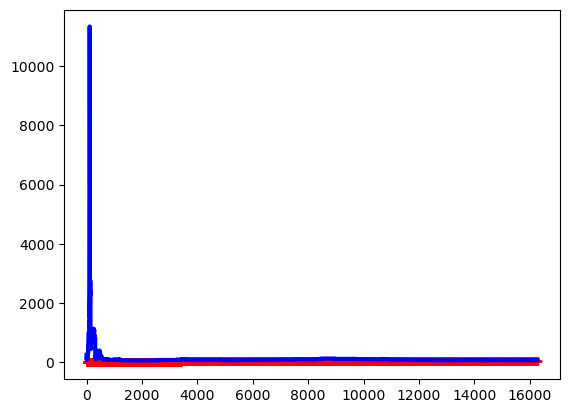

In [47]:
plot_learning_curves(lin_reg, X, y)

### References
https://www.kaggle.com/datasets/jacklacey/left-4-dead-2-20000-player-stats